In [32]:
from scipy.io import wavfile
import scipy
from scipy.signal import lfilter,firwin
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
import pydub 

/home/sa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


(array([1.23288444e+00, 9.66435796e-01, 8.46282331e-01, ...,
        7.99335087e-07, 4.84959892e-07, 2.78957611e-07]),
 array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
        9.99909297e-01, 9.99954649e-01, 1.00000000e+00]))

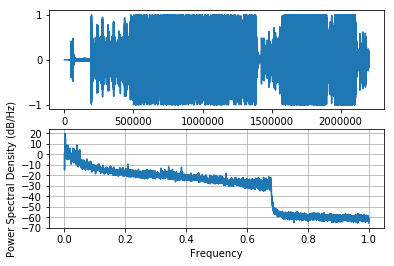

In [33]:
fs,data = wavfile.read('coke.wav')
data = data[:,1]


data = data/max(data)
plt.subplot(211)
plt.plot(data)
#print(max(data))
#normalize the data
#data = data/max(data)#(np.linalg.norm(data)) 
plt.subplot(212)
plt.psd(data,fs)

In [3]:
wavfile.write("Filteredfunction.wav",fs,data)

In [47]:
def plot_response(fs, w, h, title):
     "Utility function to plot response functions"
     fig = plt.figure()
     ax = fig.add_subplot(111)
     ax.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
     ax.set_ylim(-40, 5)
     ax.set_xlim(0, 0.5*fs)
     ax.grid(True)
     ax.set_xlabel('Frequency (Hz)')
     ax.set_ylabel('Gain (dB)')
     ax.set_title(title)

In [7]:
#Nyquist rate of the signal is given by
nyq_rate = fs / 2.0
cutoff_frequency = 15000
normalized_cutoff_frequency = cutoff_frequency/nyq_rate
filter_order = 50

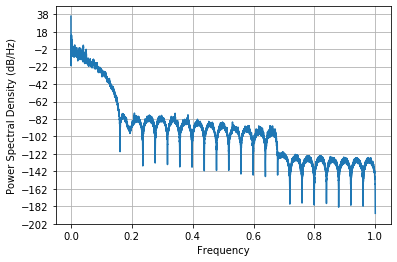

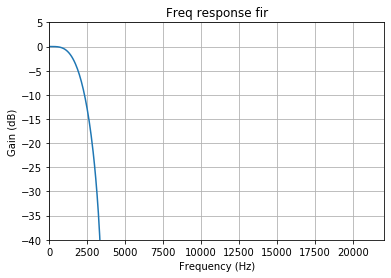

In [86]:

fir_coeff = firwin(filter_order, cutoff = normalized_cutoff_frequency, window = "hamming")
wf,hf = scipy.signal.freqz(fir_coeff)

filtered_signal = lfilter(fir_coeff,1.0,data)
plt.psd(filtered_signal,fs)
#plt.plot(filtered_signal)

plot_response(fs,wf,hf,'Freq response fir')

In [55]:
wavfile.write("Filteredfir.wav",fs,filtered_signal)

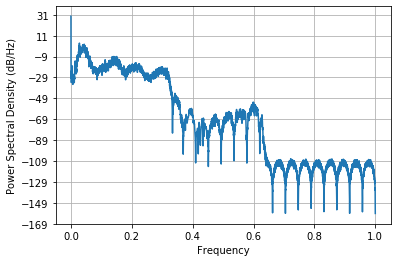

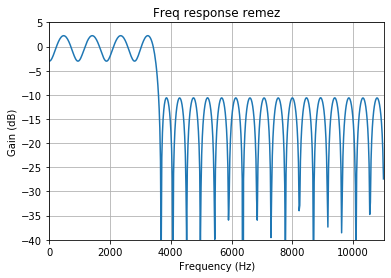

In [153]:
trans_width = 100
remez_coeff = scipy.signal.remez(filter_order,[0,cutoff_frequency,cutoff_frequency + trans_width,0.5*fs],[1,0],Hz = fs)
remez_filtered_signal = lfilter(remez_coeff,1.0,data)
plt.psd(remez_filtered_signal,fs)
wr,hr = scipy.signal.freqz(remez_coeff)
plot_response(fs,wr,hr,'Freq response remez')

In [154]:
wavfile.write("Filteredremez.wav",fs,remez_filtered_signal)

In [34]:
def firFilter(data,fs,cutoff_frequency = 14000,filter_order = 50):
    
    #Max Normalization
    data = data/max(data)
    #Normalization complete
    
    nyquist_rate = fs/2.0
    normalized_cutoff_frequency = cutoff_frequency/nyquist_rate
    
    filter_coefficent = firwin(filter_order,cutoff=normalized_cutoff_frequency,window = "hamming")
    filtered_signal = lfilter(filter_coefficent,1.0,data)
    return filtered_signal

(array([1.23243159e+00, 9.66020170e-01, 8.45870842e-01, ...,
        3.05658431e-17, 5.21093351e-18, 3.91814670e-19]),
 array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
        9.99909297e-01, 9.99954649e-01, 1.00000000e+00]))

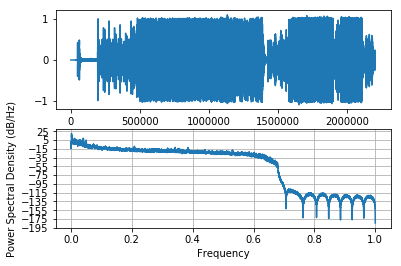

In [35]:
filtered_signal_function = firFilter(data,fs)
subplot(211)
plt.plot(filtered_signal_function)
subplot(212)
plt.psd(filtered_signal_function,fs)

In [27]:
def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    song = pydub.AudioSegment(x.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

In [29]:
write("hello",fs,filtered_signal_function)

In [36]:
with open('test.mp3','wb') as file:
    file.write(filtered_signal_function.tobytes())